In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/brand_opinions_paper

/content/drive/MyDrive/brand_opinions_paper


In [ ]:
pip install pyfonts

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager

from scipy.stats import norm
import numpy as np

from pyfonts import load_font

font = load_font(font_path="/content/drive/MyDrive/brand_opinions_paper/ГОСТ.ttf")

font_path = '/content/drive/MyDrive/brand_opinions_paper/ГОСТ_2.ttf'  # Your font path goes here
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)


plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()

matplotlib.rc('font', size=12)

/usr/local/lib/python3.12/dist-packages/pyfonts/main.py:58: UserWarning: `font_path` argument is deprecated and will be removed in a future version. Please replace `load_font(font_path='/content/drive/MyDrive/brand_opinions_paper/ГОСТ.ttf')` by `load_font('/content/drive/MyDrive/brand_opinions_paper/ГОСТ.ttf')`.
  warnings.warn(


In [ ]:
def save_matrix_to_excel(matrix, file_path):
  """Сохраняем матрицу в файл эксель"""
  df = pd.DataFrame(matrix)
  df.to_excel(file_path, index=False, header=False)

In [ ]:
def generate_symmetric_matrix(n, distribution='uniform', params=None):
  """Генерируем матрицу отношений с возможностью задания параметров распределения."""

  if distribution == 'uniform':
    if params is None:
      low, high = 0, 1  # Равномерное распределение от [0, 1)
    elif isinstance(params, (list, tuple)) and len(params) == 2:
      low, high = params
    else:
      raise ValueError("For 'uniform' distribution, params should be a tuple or list of two numbers (low, high).")
    matrix = np.random.uniform(low, high, size=(n, n))


  elif distribution == 'normal':
    if params is None:
      mean, std_dev = 0, 1  # Нормальное распределение от N(0, 1)
    elif isinstance(params, (list, tuple)) and len(params) == 2:
      mean, std_dev = params
    else:
      raise ValueError("For 'normal' distribution, params should be a tuple or list of two numbers (mean, std_dev).")
    matrix = np.random.normal(mean, std_dev, size=(n, n))

  else:
    raise ValueError("Неподдерживаемое распределение. Выберите 'uniform' или 'normal'.")

  matrix = (matrix + matrix.T) / 2
  np.fill_diagonal(matrix, 0)
  matrix = np.round(matrix, 4)
  return matrix

In [ ]:
def set_group_relations(matrix, group_indices, value):
  """Задача вручную определенных отношений в группе"""
  start_index, end_index = group_indices
  for i in range(start_index, end_index + 1):
    for j in range(start_index, end_index + 1):
      if i != j:
        matrix[i, j] = value
        matrix[j, i] = value
  return matrix

In [ ]:
import pandas as pd
import numpy as np
from pathlib import Path

def matrix_to_edgelist(df, file_output, threshold=0.5):
    """
    Преобразуем симметричную матрицу смежности в edge list:
    - убираем диагональ (self-loop)
    - берём только верхний треугольник (i < j), чтобы исключить дубли
    - удаляем нули/NaN и любые веса <= threshold
    """

    df_num = df.apply(pd.to_numeric, errors="coerce").clip(lower=0)
    mask = np.triu(np.ones(df_num.shape, dtype=bool), k=1)
    sources, targets, weights = [], [], []
    nodes = list(df_num.columns)
    for i in range(df_num.shape[0]):
        for j in range(df_num.shape[1]):
            if not mask[i, j]:
                continue
            w = df_num.iat[i, j]
            if pd.notna(w) and w > threshold:
                sources.append(nodes[i])
                targets.append(nodes[j])
                weights.append(float(w))
    pd.DataFrame({"Source": sources, "Target": targets, "Weight": weights}).to_csv(file_output, index=False)

In [ ]:
# # 1. Генерируем матрицу
# n = 100  # Increase matrix size for better testing
# rel_matrix = generate_symmetric_matrix(n)
# print("Initial matrix:")
# print(rel_matrix)

# print('\nAverage value in matrix')
# print(rel_matrix.mean())

# # 2. Задаем отношение в группе
# group_indices = (2, 5)  # Define a group from index 2 to 5
# group_value = 0.95  # Set a high relationship value for the group
# rel_matrix = set_group_relations(rel_matrix, group_indices, group_value)
# print("\nMatrix after setting group relations:")
# print(rel_matrix)

# # 3. Сохраняем матрицу
# file_path = 'relationship_matrix.xlsx'
# save_matrix_to_excel(rel_matrix, file_path)
# print(f"\nMatrix saved to {file_path}")

# # 4. Загружаем матрицу и проверяем что все ok
# try:
#     loaded_df = pd.read_excel(file_path, header=None)
#     loaded_matrix = loaded_df.values
#     print("\nLoaded matrix from Excel:")
#     print(loaded_matrix)

#     # Verification steps
#     # Check if the group relations are set correctly
#     start, end = group_indices
#     group_subset = loaded_matrix[start:end+1, start:end+1]
#     print("\nSubset of loaded matrix for the group:")
#     print(group_subset)

#     # Check symmetry (within a tolerance due to floating point)
#     is_symmetric = np.allclose(loaded_matrix, loaded_matrix.T, atol=1e-4) # Using atol for rounding
#     print(f"\nIs loaded matrix symmetric? {is_symmetric}")

#     # Check diagonal zeros
#     diagonal_zeros = np.all(np.diag(loaded_matrix) == 0)
#     print(f"Does loaded matrix have zeros on the diagonal? {diagonal_zeros}")

#     # Check rounding (visual inspection or check a sample)
#     print(f"Sample value from loaded matrix (should be rounded): {loaded_matrix[0, 1]}")
#     print(f"Sample value from the group (should be {group_value}): {loaded_matrix[start, start+1]}")


# except FileNotFoundError:
#     print(f"Error: File not found at {file_path}")
# except Exception as e:
#     print(f"An error occurred during loading or verification: {e}")

In [ ]:
import os

# bool_updated_vector = False
# np.random.seed(42) # first try
# %cd /content/drive/MyDrive/brand_opinions_paper/try_1

# bool_updated_vector = False
# np.random.seed(100) # second try
# %cd /content/drive/MyDrive/brand_opinions_paper/try_2

# bool_updated_vector = False
# np.random.seed(1) # third try
# %cd /content/drive/MyDrive/brand_opinions_paper/try_3


# output_folder = "try_updated"
# os.makedirs(output_folder, exist_ok=True)
# bool_updated_vector = True

# np.random.seed(42) # updated try
# %cd /content/drive/MyDrive/brand_opinions_paper/try_updated


# output_folder = "try_updated_connections_with_new_Zara"
# os.makedirs(output_folder, exist_ok=True)
# bool_updated_vector = True

# np.random.seed(42) # updated connections try
# %cd /content/drive/MyDrive/brand_opinions_paper/try_updated_connections_with_new_Zara



output_folder = "try_updated_connections_with_old_Zara"
os.makedirs(output_folder, exist_ok=True)
bool_updated_vector = False

np.random.seed(42) # updated connections with old zara
%cd /content/drive/MyDrive/brand_opinions_paper/try_updated_connections_with_old_Zara

/content/drive/MyDrive/brand_opinions_paper/try_updated_connections_with_old_Zara


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

# Параметры
num_agents = 100
num_themes = 12  # 10 новостных + 2 бренда
vector_dim = 1044
num_timesteps = 30
news_themes = 10
brand_themes = 2

redbull_value = 0.9
zara_value = 0.9

redbull_proportion = 0.1
zara_proportion = 0.1

# Настройки вероятности выбора темы
main_topic_prob = 0.9
other_topic_prob = 1 - main_topic_prob

# Папка для сохранения
output_folder_opinion = "opinion_simulation/opinion"
os.makedirs(output_folder_opinion, exist_ok=True)

output_folder_relation = "opinion_simulation/relation"
os.makedirs(output_folder_relation, exist_ok=True)

output_folder_opinion = "opinion_simulation/edge_lists"
os.makedirs(output_folder_opinion, exist_ok=True)

output_folder_opinion = "images/opinios_visialisation"
os.makedirs(output_folder_opinion, exist_ok=True)

In [ ]:
data = (pd.read_excel('../tabel.xlsx'))

first_column_name = data.columns[0]
data = data.drop(columns=[first_column_name])
# data = np.nan_to_num(data)

data.rename(columns={"Redbull": "X", "Zara": "Y"}, inplace=True)

data

,Существ,Прил,Глагол,Политика,В мире,Экономика,Общество,Армия,Наука,Спорт,Культура,Религия,Туризм,X,Y
0,0.000578,0.002164,0.023944,0.006797,0.006598,0.008016,0.008658,0.014235,0.006160,0.011194,0.010050,0.006734,0.008791,0.001209,0.007974
1,0.000000,0.000000,0.002421,0.000000,0.000733,0.000000,0.000000,0.000000,0.000000,0.000000,0.006281,0.000000,0.006593,0.000000,0.000000
2,0.000867,0.000000,0.000538,0.000000,0.001466,0.000000,0.002886,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000867,0.000433,0.001345,0.000850,0.000733,0.002004,0.001443,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002418,0.003190
4,0.000867,0.000000,0.000000,0.000850,0.000000,0.002004,0.000000,0.000000,0.002053,0.000000,0.000000,0.000000,0.000000,0.002418,0.003190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0.000000,0.000000,0.000000,0.001699,0.002199,0.001002,0.001443,0.000000,0.000000,0.000000,0.001256,0.003367,0.000000,0.000000,0.000000
1040,0.000867,0.000000,0.000000,0.000850,0.000733,0.000000,0.000000,0.003559,0.000000,0.000000,0.002513,0.000000,0.000000,0.000000,0.000000
1041,0.000000,0.001298,0.001883,0.000000,0.000733,0.000000,0.000000,0.003559,0.002053,0.000000,0.000000,0.006734,0.000000,0.003628,0.000000
1042,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
data.describe()

,Существ,Прил,Глагол,Политика,В мире,Экономика,Общество,Армия,Наука,Спорт,Культура,Религия,Туризм,X,Y
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,0.000958,0.000958,0.000958,0.000958,0.000958,0.000958,0.000958,0.000958,0.000958,0.000958,0.000958,0.000958,0.000958,0.000958,0.000958
std,0.005541,0.003546,0.003451,0.002620,0.002439,0.002434,0.002863,0.002817,0.003460,0.002939,0.002577,0.003389,0.002849,0.001708,0.002569
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000289,0.000433,0.000269,0.000850,0.000733,0.001002,0.000000,0.000000,0.000000,0.000000,0.001256,0.000000,0.000000,0.001209,0.001595
max,0.067341,0.052358,0.036051,0.033985,0.029326,0.035070,0.028860,0.035587,0.043121,0.044776,0.036432,0.063973,0.026374,0.018138,0.027113


In [ ]:
data.isna().sum()

,0
Существ,0
Прил,0
Глагол,0
Политика,0
В мире,0
Экономика,0
Общество,0
Армия,0
Наука,0
Спорт,0


In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# 1. Загрузка данных
file_path = "../tabel.xlsx"  # Путь к файлу
df = pd.read_excel(file_path)

df.drop(df.columns[[0]] ,axis=1 ,inplace=True)

# новый вектор зары
if bool_updated_vector:
  file_path = "../new_vectors.xlsx"  # Путь к файлу
  df_new_vectors = pd.read_excel(file_path,header=None)

  df.drop(df.columns[[-1]] ,axis=1 ,inplace=True) # дропаем зару
  df['Zara'] = df_new_vectors[df_new_vectors.columns[-1]] # записываем зару

df.rename(columns={"Redbull": "X", "Zara": "Y"}, inplace=True)

# 3. Задаём интересующие столбцы
columns_to_compare = [
    "Существ",
    "Прил",
    "Глагол"
]

# topics = [
#     "Политика", "В мире", "Экономика", "Общество", "Армия",
#     "Наука", "Спорт", "Культура", "Религия", "Туризм", "Redbull", "Zara"
# ]

topics = [
    "Политика", "В мире", "Экономика", "Общество", "Армия",
    "Наука", "Спорт", "Культура", "Религия", "Туризм", "X", "Y"
]

# 4. Расчёт косинусной близости
cosine_results = {}

for col in columns_to_compare:
    vec = df[[col]].values  # Вектор по одной части речи
    theme_vectors = df[topics].values  # Матрица тем
    similarities = cosine_similarity(vec.T, theme_vectors.T)[0]
    cosine_results[col] = similarities

# 5. Преобразование в DataFrame
cosine_df = pd.DataFrame(cosine_results, index=topics)

# Отображение результата
print("Косинусные близости (тематические векторы):")
print(cosine_df)


Косинусные близости (тематические векторы):
            Существ      Прил    Глагол
Политика   0.181795  0.222273  0.320746
В мире     0.173589  0.257784  0.345783
Экономика  0.129084  0.234236  0.324539
Общество   0.145801  0.219301  0.312186
Армия      0.132274  0.245741  0.333575
Наука      0.106138  0.210184  0.284542
Спорт      0.193007  0.272636  0.342066
Культура   0.166196  0.265099  0.371506
Религия    0.139889  0.270504  0.355328
Туризм     0.119013  0.221317  0.314073
X          0.215188  0.285408  0.348795
Y          0.143031  0.239847  0.305647


In [ ]:
cosine_df["Существ"].tolist()

[0.1817951481203791,
 0.17358905826388182,
 0.12908364345117665,
 0.1458012093983002,
 0.13227413087335166,
 0.10613750742038117,
 0.1930074256787528,
 0.1661957136330049,
 0.13988888338438893,
 0.11901337391125139,
 0.21518797569482587,
 0.14303081439540008]

In [ ]:
agents_dik = {}

type_of_agent = []
opinions = []

# matrix_relation = (pd.read_excel("relationship_matrix.xlsx", header=None)).values.tolist() # если есть подготовленная матрица, которую нужно будет загрузить
matrix_relation = generate_symmetric_matrix(num_agents, params=(0.1, 0.1))

In [ ]:
import random

# мнение по косинусной близости

# for i in range(num_agents):
#   if i < num_agents // 3:
#         type_of_agent.append(0)
#         opinions.append(cosine_df["Существ"].tolist())
#   elif i < 2 * num_agents // 3:
#         type_of_agent.append(1)
#         opinions.append(cosine_df["Прил"].tolist())
#   else:
#         type_of_agent.append(2)
#         opinions.append(cosine_df["Глагол"].tolist())

# мнение равномерно распределено от 0 до 1

for i in range(num_agents):
  if i < num_agents // 3:
        type_of_agent.append(0)
        opinions.append([random.random() for i in range(num_themes)])
  elif i < 2 * num_agents // 3:
        type_of_agent.append(1)
        opinions.append([random.random() for i in range(num_themes)])
  else:
        type_of_agent.append(2)
        opinions.append([random.random() for i in range(num_themes)])

In [ ]:
agents_dik['opinioins'] = opinions
agents_dik['type_of_agent'] = type_of_agent
agents_dik['matrix_relation'] = matrix_relation

In [ ]:
len(opinions[0])


12

In [ ]:
for i in range(num_agents):
  agents_dik["opinioins"][i][-2] = 0.1

for i in range(num_agents):
  agents_dik["opinioins"][i][-1] = 0.1

for i in random.sample(range(num_agents), int(redbull_proportion*num_agents)):
  agents_dik["opinioins"][i][-2] = redbull_value

for i in random.sample(range(num_agents), int(zara_proportion*num_agents)):
  agents_dik["opinioins"][i][-1] = zara_value

In [ ]:
pd.DataFrame(agents_dik['opinioins']).iloc[:, -2].value_counts()

,count
10,
0.1,90
0.9,10


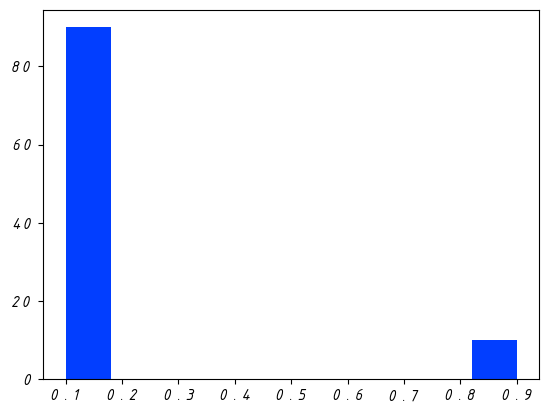

In [ ]:
plt.hist(pd.DataFrame(agents_dik['opinioins']).iloc[:, -1])  #zara
plt.show()

In [ ]:
pd.DataFrame(agents_dik['opinioins']).iloc[:, -1].value_counts()

,count
11,
0.1,90
0.9,10


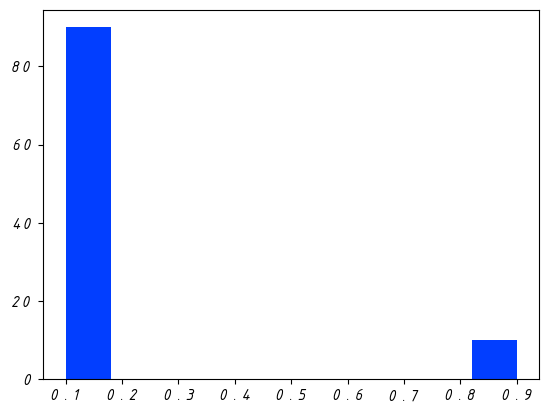

In [ ]:
plt.hist(pd.DataFrame(agents_dik['opinioins']).iloc[:, -2]) #redbull
plt.show()

In [ ]:
agents_dik['matrix_relation']

array([[0. , 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0. , 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0.1, 0. , ..., 0.1, 0.1, 0.1],
       ...,
       [0.1, 0.1, 0.1, ..., 0. , 0.1, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0. , 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0. ]])

In [ ]:
save_matrix_to_excel(agents_dik['opinioins'], 'opinion_simulation/opinion/opinioins_00.xlsx')
save_matrix_to_excel(agents_dik['matrix_relation'], 'opinion_simulation/relation/relations_00.xlsx')
matrix_to_edgelist(pd.DataFrame(agents_dik['matrix_relation']), 'opinion_simulation/edge_lists/edge_list_00.csv')

In [ ]:
node_list = {'Id': range(100), 'Label': list(f'Agent_{i}' for i in range(100)), 'Type': agents_dik['type_of_agent']}
nl_df = pd.DataFrame(data=node_list, index=None)

nl_df.to_csv('opinion_simulation/node_list.csv', index=False)

In [ ]:
topics = list(df.columns.values[3:])

# 4. Расчёт косинусной близости
cosine_results = {}

for col in columns_to_compare:
    vec = df[[col]].values  # Вектор по одной части речи
    theme_vectors = df[topics].values  # Матрица тем
    similarities = cosine_similarity(vec.T, theme_vectors.T)[0]
    cosine_results[col] = similarities

cosine_df = pd.DataFrame(cosine_results, index=topics)
cosine_df

,Существ,Прил,Глагол
Политика,0.181795,0.222273,0.320746
В мире,0.173589,0.257784,0.345783
Экономика,0.129084,0.234236,0.324539
Общество,0.145801,0.219301,0.312186
Армия,0.132274,0.245741,0.333575
Наука,0.106138,0.210184,0.284542
Спорт,0.193007,0.272636,0.342066
Культура,0.166196,0.265099,0.371506
Религия,0.139889,0.270504,0.355328
Туризм,0.119013,0.221317,0.314073


In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# 1. Загрузка данных
file_path = "../tabel.xlsx"  # Путь к файлу
df_stats = pd.read_excel(file_path)


# новый вектор зары
if bool_updated_vector:
  file_path = "../new_vectors.xlsx"  # Путь к файлу
  df_new_vectors = pd.read_excel(file_path,header=None)

  df_stats.drop(df_stats.columns[[-1]] ,axis=1 ,inplace=True) # дропаем зару
  df_stats['Zara'] = df_new_vectors[df_new_vectors.columns[-1]] # записываем зару

df_stats.rename(columns={"Redbull": "X", "Zara": "Y"}, inplace=True)

# 2. Создание новых столбцов
df_stats["Существ и прил"] = (df_stats["Существ"] + df_stats["Прил"]) / 2
df_stats["Существ и глагол"] = (df_stats["Существ"] + df_stats["Глагол"]) / 2
df_stats["Прил и глагол"] = (df_stats["Прил"] + df_stats["Глагол"]) / 2

# 3. Задаём интересующие столбцы
columns_to_compare = [
    "Существ",
    "Прил",
    "Глагол",
    "Существ и прил",
    "Существ и глагол",
    "Прил и глагол"
]

# topics = [
#     "Политика", "В мире", "Экономика", "Общество", "Армия",
#     "Наука", "Спорт", "Культура", "Религия", "Туризм", "Redbull", "Zara"
# ]

topics = [
    "Политика", "В мире", "Экономика", "Общество", "Армия",
    "Наука", "Спорт", "Культура", "Религия", "Туризм", "X", "Y"
]

# 4. Расчёт косинусной близости
cosine_results = {}

for col in columns_to_compare:
    vec = df_stats[[col]].values  # Вектор по одной части речи
    theme_vectors = df_stats[topics].values  # Матрица тем
    similarities = cosine_similarity(vec.T, theme_vectors.T)[0]
    cosine_results[col] = similarities

# 5. Преобразование в DataFrame
cosine_df_stats = pd.DataFrame(cosine_results, index=topics)

# Отображение результата
print("Косинусные близости (тематические векторы):")
print(cosine_df_stats)

Косинусные близости (тематические векторы):
            Существ      Прил    Глагол  Существ и прил  Существ и глагол  \
Политика   0.181795  0.222273  0.320746        0.241302          0.292456   
В мире     0.173589  0.257784  0.345783        0.252365          0.298320   
Экономика  0.129084  0.234236  0.324539        0.208172          0.254357   
Общество   0.145801  0.219301  0.312186        0.213309          0.261061   
Армия      0.132274  0.245741  0.333575        0.216072          0.261134   
Наука      0.106138  0.210184  0.284542        0.179644          0.217679   
Спорт      0.193007  0.272636  0.342066        0.273854          0.311236   
Культура   0.166196  0.265099  0.371506        0.250436          0.305130   
Религия    0.139889  0.270504  0.355328        0.233629          0.277397   
Туризм     0.119013  0.221317  0.314073        0.194513          0.241680   
X          0.215188  0.285408  0.348795        0.296379          0.331284   
Y          0.143031  0.239847  0

In [ ]:
topics = list(df.columns.values[3:])

i = 1
j = 40
if agents_dik['type_of_agent'][i] != agents_dik['type_of_agent'][j]:
  vec1 = df.iloc[:, [agents_dik['type_of_agent'][i]]].values
  vec2 = df.iloc[:, [agents_dik['type_of_agent'][j]]].values
  vec = (vec1+vec2)/2
else:
  vec = df.iloc[:, [agents_dik['type_of_agent'][i]]].values

theme_vectors = df[topics].values  # Матрица тем
similarities = cosine_similarity(vec.T, theme_vectors.T)[0]

print(similarities)

topic_indexes = np.argsort(similarities)[::-1]
choosing_count = 0

print(topic_indexes)

# выбор темы для общения
while True:
  choosing_index = choosing_count % num_themes
  print(similarities[topic_indexes[choosing_index]])
  if np.random.rand() < similarities[topic_indexes[choosing_index]]:
    topic = [topic_indexes[choosing_index]][0]
    print(topic)
    break
  choosing_count += 1

[0.24130243 0.25236512 0.20817167 0.21330855 0.21607227 0.17964427
 0.27385435 0.2504357  0.23362874 0.19451281 0.29637924 0.22116861]
[10  6  1  7  0  8 11  4  3  2  9  5]
0.29637924281914885
0.2738543497837782
0.2523651155391509
1


In [ ]:
import math

topics = list(df.columns.values[3:])

topics_count_dik = {}
for k in topics:
  topics_count_dik[k] = 0

for t in tqdm(range(num_timesteps)):
    for i in range(num_agents):
        for j in range(i + 1, num_agents):
            if np.random.rand() < agents_dik['matrix_relation'][i][j]: # решаем, будем ли мы общаться

              # рассчет косинусной близости по темам
              if agents_dik['type_of_agent'][i] != agents_dik['type_of_agent'][j]:
                vec1 = df.iloc[:, [agents_dik['type_of_agent'][i]]].values
                vec2 = df.iloc[:, [agents_dik['type_of_agent'][j]]].values
                vec = (vec1+vec2)/2
              else:
                vec = df.iloc[:, [agents_dik['type_of_agent'][i]]].values

              theme_vectors = df[topics].values  # Матрица тем
              similarities = cosine_similarity(vec.T, theme_vectors.T)[0]

              topic_indexes = np.argsort(similarities)[::-1]
              choosing_count = 0

              # выбор темы для общения
              while True:
                choosing_index = choosing_count % num_themes
                if np.random.rand() < similarities[topic_indexes[choosing_index]]:
                  topic = [topic_indexes[choosing_index]][0]
                  topics_count_dik[topics[topic]] += 1
                  break
                choosing_count += 1



              # Обмен мнениями ver 0.1
              opinion_i = agents_dik['opinioins'][i][topic]
              opinion_j = agents_dik['opinioins'][j][topic]
              delta = opinion_j - opinion_i
              agents_dik['opinioins'][i][topic] += 0.1 * delta
              agents_dik['opinioins'][j][topic] -= 0.1 * delta

              # Обновление связи ver 0.1
              # diff = abs(opinion_i - opinion_j)
              # max_val = max(abs(opinion_i), abs(opinion_j), 1e-8)
              # threshold = 0.1 * max_val
              # update_val = 1 / max(diff, 1e-8)

              # if diff > threshold:
              #     agents_dik['matrix_relation'][i][j] -= update_val
              # else:
              #     agents_dik['matrix_relation'][i][j] += update_val

              # # Ограничения
              # agents_dik['matrix_relation'][i][j] = min(max(agents_dik['matrix_relation'][i][j], 0), 1)
              # agents_dik['matrix_relation'][j][i] = agents_dik['matrix_relation'][i][j]



              # Обновление связи ver 0.2
              diff = abs(opinion_i - opinion_j) # разница мнений
              threshold_mean = 0.2 # "средняя" разница во мнениях, которая не меняет связь
              similarity = 1 - diff # мера схожести
              w = agents_dik['matrix_relation'][i][j]
              eta = 1.2 # шаг обновления при контакте

              if diff < threshold_mean:
                  w += eta * (similarity - 0.5) * w * (1 - w)
              elif diff > threshold_mean:
                  w += eta * (similarity - 0.5) * w * (1 - w)
              else:
                  w = w

              # ограничения
              w = min(max(w, 0.0), 1.0)
              agents_dik['matrix_relation'][i][j] = w
              agents_dik['matrix_relation'][j][i] = w

            # Обновление связи ver 0.2
            # параметры затухания (если нет контакта)
            rho = 0.05        # скорость забывания (чем больше, тем быстрее)
            w0 = 0.0         # базовый уровень связи (куда стремится при забывании)

            w = agents_dik['matrix_relation'][i][j]
            w = w0 + (w - w0) * math.exp(-rho)

            w = min(max(w, 0.0), 1.0)
            agents_dik['matrix_relation'][i][j] = w
            agents_dik['matrix_relation'][j][i] = w


    if t+1 <10:
      save_matrix_to_excel(agents_dik['opinioins'], f'opinion_simulation/opinion/opinioins_0{t+1}.xlsx')
      save_matrix_to_excel(agents_dik['matrix_relation'], f'opinion_simulation/relation/relations_0{t+1}.xlsx')
      matrix_to_edgelist(pd.DataFrame(agents_dik['matrix_relation']), f'opinion_simulation/edge_lists/edge_list_0{t+1}.csv')
    else:
      save_matrix_to_excel(agents_dik['opinioins'], f'opinion_simulation/opinion/opinioins_{t+1}.xlsx')
      save_matrix_to_excel(agents_dik['matrix_relation'], f'opinion_simulation/relation/relations_{t+1}.xlsx')
      matrix_to_edgelist(pd.DataFrame(agents_dik['matrix_relation']), f'opinion_simulation/edge_lists/edge_list_{t+1}.csv')

100%|██████████| 30/30 [00:32<00:00,  1.08s/it]


In [ ]:
sns.set_palette("bright")

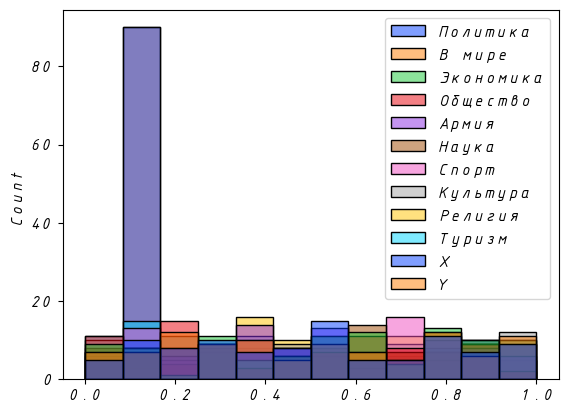

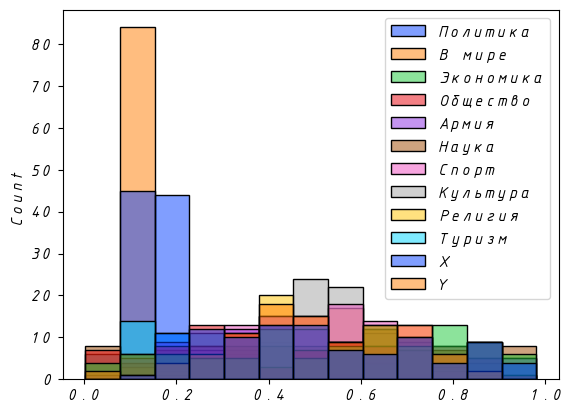

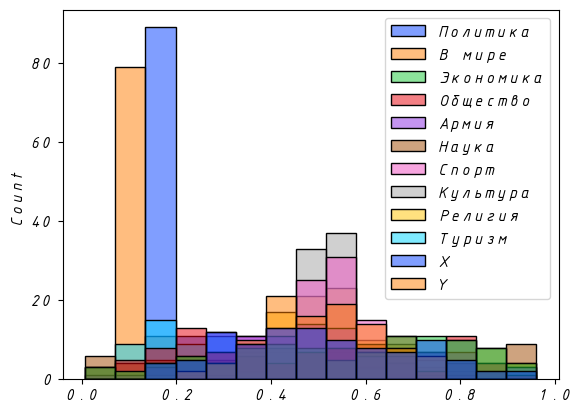

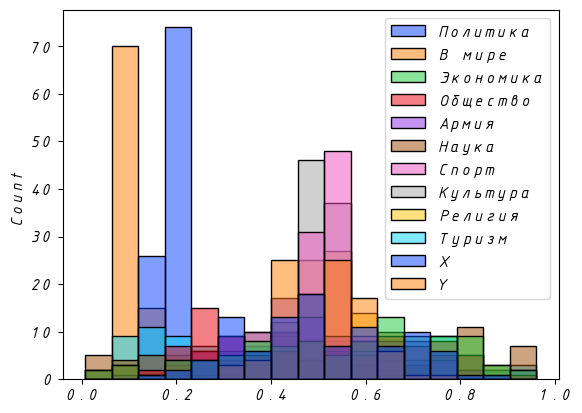

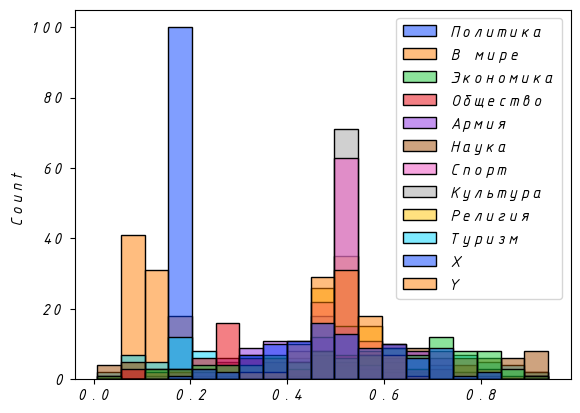

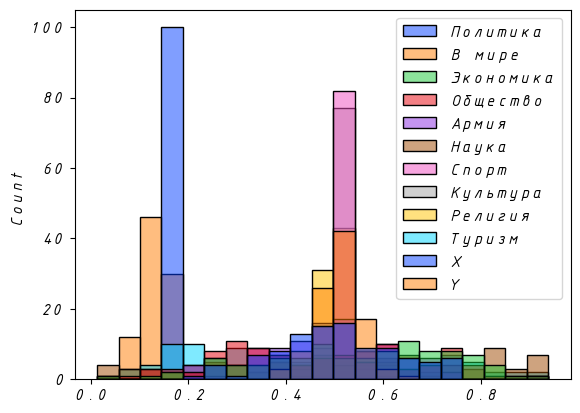

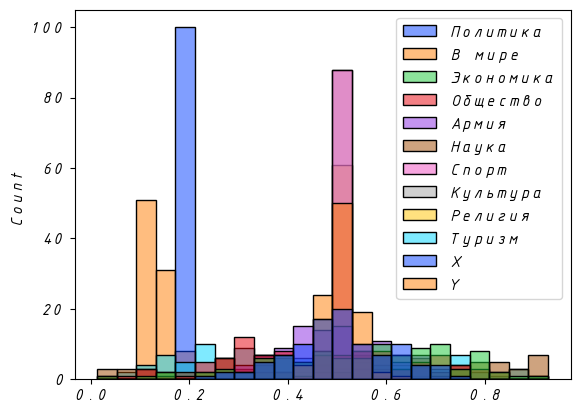

In [ ]:
for i in range(num_timesteps//5 + 1):
  if i * 5 < 10:
    df_opinions = pd.read_excel(f'opinion_simulation/opinion/opinioins_0{i*5}.xlsx', names=topics, header=None)
    sns.histplot(df_opinions, palette='bright')
    plt.savefig(f'images/opinios_visialisation/all_opinions_0{i*5}.jpg')
    plt.show()
  else:
    df_opinions = pd.read_excel(f'opinion_simulation/opinion/opinioins_{i*5}.xlsx', names=topics, header=None)
    sns.histplot(df_opinions, palette='bright')
    plt.savefig(f'images/opinios_visialisation/all_opinions_{i*5}.jpg')
    plt.show()

In [ ]:
# for i in range(num_timesteps//5 + 1):
#   if i == 0:
#     df_brand_description = pd.read_excel(f'opinion_simulation/opinion/opinioins_00.xlsx', names=topics, header=None).iloc[:, -2:]
#   elif i * 5 < 10:
#       df_brand_description[f'Redbull_0{i*5}'] = pd.read_excel(f'opinion_simulation/opinion/opinioins_0{i*5}.xlsx', names=topics, header=None).iloc[:, -2]
#       df_brand_description[f'Zara_0{i*5}'] = pd.read_excel(f'opinion_simulation/opinion/opinioins_0{i*5}.xlsx', names=topics, header=None).iloc[:, -1]
#   else:
#       df_brand_description[f'Redbull_0{i*5}'] = pd.read_excel(f'opinion_simulation/opinion/opinioins_{i*5}.xlsx', names=topics, header=None).iloc[:, -2]
#       df_brand_description[f'Zara_0{i*5}'] = pd.read_excel(f'opinion_simulation/opinion/opinioins_{i*5}.xlsx', names=topics, header=None).iloc[:, -1]

# df_brand_description.describe().to_csv("opinions_changing.csv")
# df_brand_description.describe()

for i in range(num_timesteps//5 + 1):
  if i == 0:
    df_brand_description = pd.read_excel(f'opinion_simulation/opinion/opinioins_00.xlsx', names=topics, header=None).iloc[:, -2:]
  elif i * 5 < 10:
      df_brand_description[f'X_0{i*5}'] = pd.read_excel(f'opinion_simulation/opinion/opinioins_0{i*5}.xlsx', names=topics, header=None).iloc[:, -2]
      df_brand_description[f'Y_0{i*5}'] = pd.read_excel(f'opinion_simulation/opinion/opinioins_0{i*5}.xlsx', names=topics, header=None).iloc[:, -1]
  else:
      df_brand_description[f'X_0{i*5}'] = pd.read_excel(f'opinion_simulation/opinion/opinioins_{i*5}.xlsx', names=topics, header=None).iloc[:, -2]
      df_brand_description[f'Y_0{i*5}'] = pd.read_excel(f'opinion_simulation/opinion/opinioins_{i*5}.xlsx', names=topics, header=None).iloc[:, -1]

df_brand_description.describe().to_csv("opinions_changing.csv")
df_brand_description.describe()

,X,Y,X_05,Y_05,X_010,Y_010,X_015,Y_015,X_020,Y_020,X_025,Y_025,X_030,Y_030
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.180000,0.180000,0.180000,0.180000,0.180000,0.180000,0.180000,0.180000,0.180000,0.180000,0.180000,0.180000,0.180000,0.180000
std,0.241209,0.241209,0.075736,0.226669,0.020990,0.215711,0.008622,0.195182,0.003200,0.186586,0.001428,0.165808,0.000611,0.160751
min,0.100000,0.100000,0.104024,0.100000,0.151842,0.100000,0.166906,0.100000,0.174021,0.100000,0.177608,0.100000,0.178837,0.100000
25%,0.100000,0.100000,0.137283,0.100000,0.165667,0.100000,0.175421,0.100000,0.178182,0.100885,0.179174,0.104513,0.179639,0.106329
50%,0.100000,0.100000,0.158125,0.100000,0.175982,0.100000,0.178203,0.105439,0.179404,0.106480,0.179677,0.113521,0.179949,0.122306
75%,0.100000,0.100000,0.192323,0.100000,0.185717,0.107200,0.182312,0.158351,0.180887,0.159559,0.180479,0.163498,0.180199,0.160112
max,0.900000,0.900000,0.590313,0.900000,0.261160,0.900000,0.220047,0.900000,0.197257,0.900000,0.187299,0.900000,0.183030,0.900000


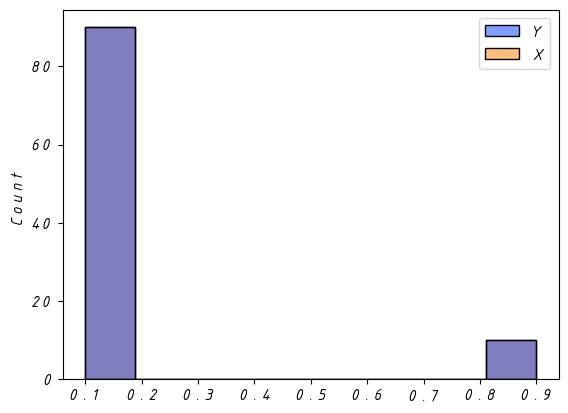

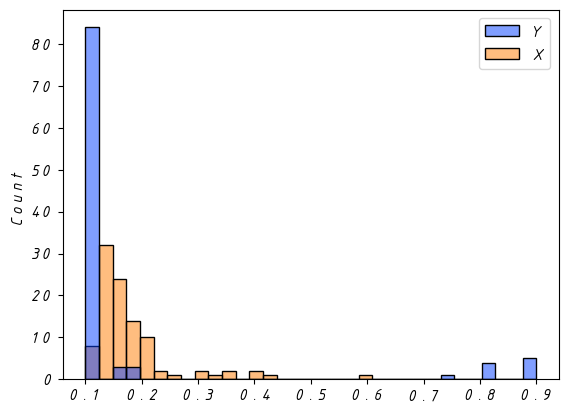

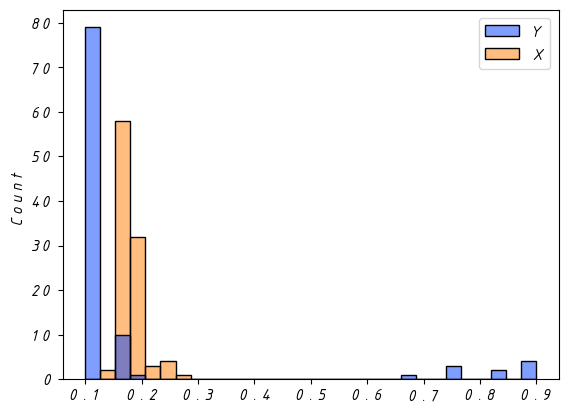

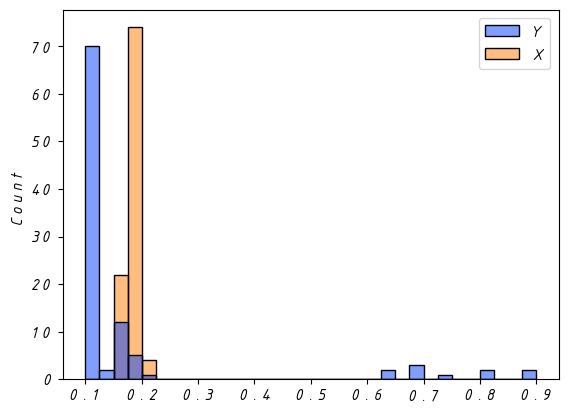

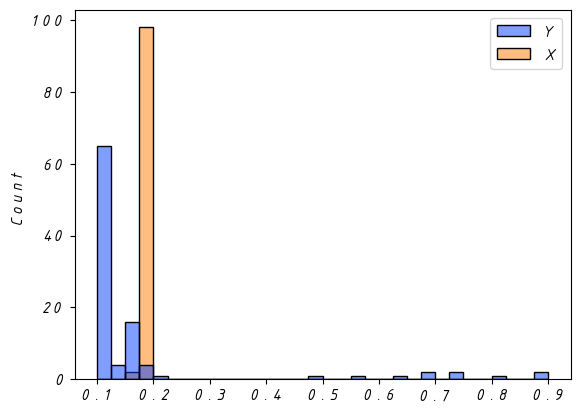

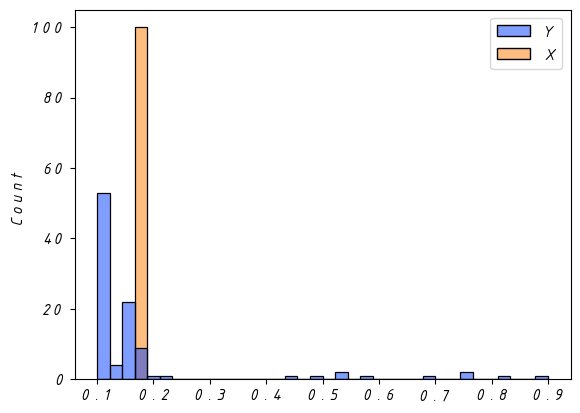

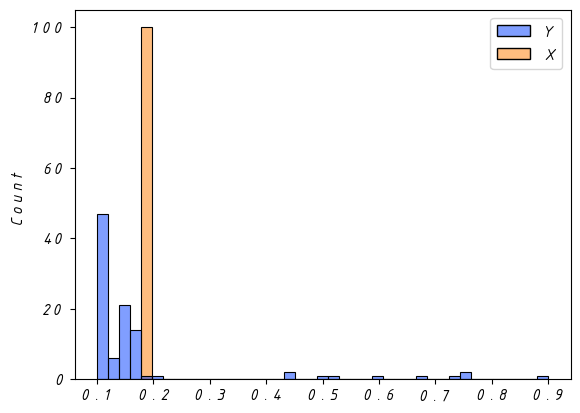

In [ ]:
# for i in range(num_timesteps//5 + 1):
#   if i * 5 < 10:
#     df_opinions = pd.read_excel(f'opinion_simulation/opinion/opinioins_0{i*5}.xlsx', names=topics, header=None)
#     sns.histplot([df_opinions['Zara'], df_opinions['Redbull']], palette='bright')
#     plt.savefig(f'images/opinios_visialisation/zara_redbull_opinions_0{i*5}.jpg')
#     plt.show()
#   else:
#     df_opinions = pd.read_excel(f'opinion_simulation/opinion/opinioins_{i*5}.xlsx', names=topics, header=None)
#     sns.histplot([df_opinions['Zara'], df_opinions['Redbull']], palette='bright')
#     plt.savefig(f'images/opinios_visialisation/zara_redbull_opinions_{i*5}.jpg')
#     plt.show()

for i in range(num_timesteps//5 + 1):
  if i * 5 < 10:
    df_opinions = pd.read_excel(f'opinion_simulation/opinion/opinioins_0{i*5}.xlsx', names=topics, header=None)
    sns.histplot([df_opinions['Y'], df_opinions['X']], palette='bright')
    plt.savefig(f'images/opinios_visialisation/X_Y_opinions_0{i*5}.jpg')
    plt.show()
  else:
    df_opinions = pd.read_excel(f'opinion_simulation/opinion/opinioins_{i*5}.xlsx', names=topics, header=None)
    sns.histplot([df_opinions['Y'], df_opinions['X']], palette='bright')
    plt.savefig(f'images/opinios_visialisation/X_Y_opinions_{i*5}.jpg')
    plt.show()

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# 1. Загрузка данных
file_path = "../tabel.xlsx"  # Путь к файлу
df = pd.read_excel(file_path)

# новый вектор зары
if bool_updated_vector:
  file_path = "../new_vectors.xlsx"  # Путь к файлу
  df_new_vectors = pd.read_excel(file_path,header=None)

  df.drop(df.columns[[-1]] ,axis=1 ,inplace=True) # дропаем зару
  df['Zara'] = df_new_vectors[df_new_vectors.columns[-1]] # записываем зару


df.rename(columns={"Redbull": "X", "Zara": "Y"}, inplace=True)

# 2. Создание новых столбцов
df["Существ и прил"] = (df["Существ"] + df["Прил"]) / 2
df["Существ и глагол"] = (df["Существ"] + df["Глагол"]) / 2
df["Прил и глагол"] = (df["Прил"] + df["Глагол"]) / 2

# 3. Задаём интересующие столбцы
columns_to_compare = [
    "Существ",
    "Прил",
    "Глагол",
    "Существ и прил",
    "Существ и глагол",
    "Прил и глагол"
]

# topics = [
#     "Политика", "В мире", "Экономика", "Общество", "Армия",
#     "Наука", "Спорт", "Культура", "Религия", "Туризм", "Redbull", "Zara"
# ]

topics = [
    "Политика", "В мире", "Экономика", "Общество", "Армия",
    "Наука", "Спорт", "Культура", "Религия", "Туризм", "X", "Y"
]

# 4. Расчёт косинусной близости
cosine_results = {}

for col in columns_to_compare:
    vec = df[[col]].values  # Вектор по одной части речи
    theme_vectors = df[topics].values  # Матрица тем
    similarities = cosine_similarity(vec.T, theme_vectors.T)[0]
    cosine_results[col] = similarities

# 5. Преобразование в DataFrame
cosine_df = pd.DataFrame(cosine_results, index=topics)

# Отображение результата
print("Косинусные близости (тематические векторы):")
print(cosine_df)

Косинусные близости (тематические векторы):
            Существ      Прил    Глагол  Существ и прил  Существ и глагол  \
Политика   0.181795  0.222273  0.320746        0.241302          0.292456   
В мире     0.173589  0.257784  0.345783        0.252365          0.298320   
Экономика  0.129084  0.234236  0.324539        0.208172          0.254357   
Общество   0.145801  0.219301  0.312186        0.213309          0.261061   
Армия      0.132274  0.245741  0.333575        0.216072          0.261134   
Наука      0.106138  0.210184  0.284542        0.179644          0.217679   
Спорт      0.193007  0.272636  0.342066        0.273854          0.311236   
Культура   0.166196  0.265099  0.371506        0.250436          0.305130   
Религия    0.139889  0.270504  0.355328        0.233629          0.277397   
Туризм     0.119013  0.221317  0.314073        0.194513          0.241680   
X          0.215188  0.285408  0.348795        0.296379          0.331284   
Y          0.143031  0.239847  0

In [ ]:
cosine_df.to_excel("cosine_length.xlsx")

In [ ]:
topics_stats = pd.DataFrame(topics_count_dik.items(), columns=['Тема', 'Количество обсуждений'])
num_iteractions = topics_stats['Количество обсуждений'].sum()
topics_stats['%'] = topics_stats['Количество обсуждений'] / num_iteractions * 100
topics_stats

,Тема,Количество обсуждений,%
0,Политика,659,4.998862
1,В мире,1294,9.815672
2,Экономика,267,2.025336
3,Общество,258,1.957066
4,Армия,482,3.656224
5,Наука,100,0.758553
6,Спорт,2093,15.876508
7,Культура,2652,20.116817
8,Религия,1322,10.028066
9,Туризм,155,1.175757


In [ ]:
topics_stats.to_excel("topics_stats.xlsx")

In [ ]:
print(num_iteractions, f'{round(num_iteractions/(num_agents*(num_agents-1)/2*num_timesteps)*100, 4)}%')

13183 8.8774%
